# Linear Regression Model
* This model is created with a  Kaggle dataset -  Boston House Price *

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

In [6]:
dataset = load_boston()
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [11]:
X = pd.DataFrame(data = dataset['data'], columns= dataset['feature_names'])
y = dataset['target']
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [13]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


## EDA

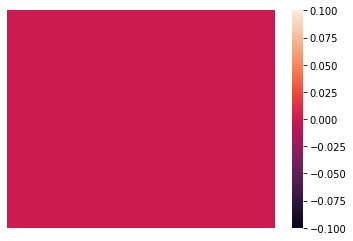

In [14]:
sns.heatmap(X.isnull(),xticklabels = False,yticklabels= False)

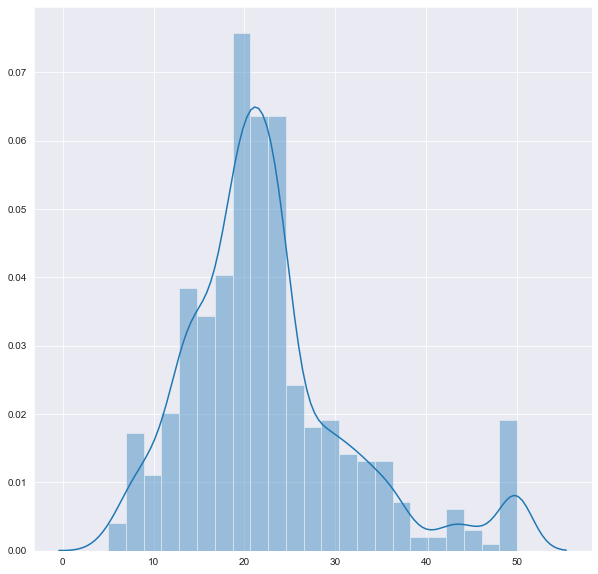

In [17]:
fig = plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.distplot(y)

<Figure size 1800x1800 with 0 Axes>

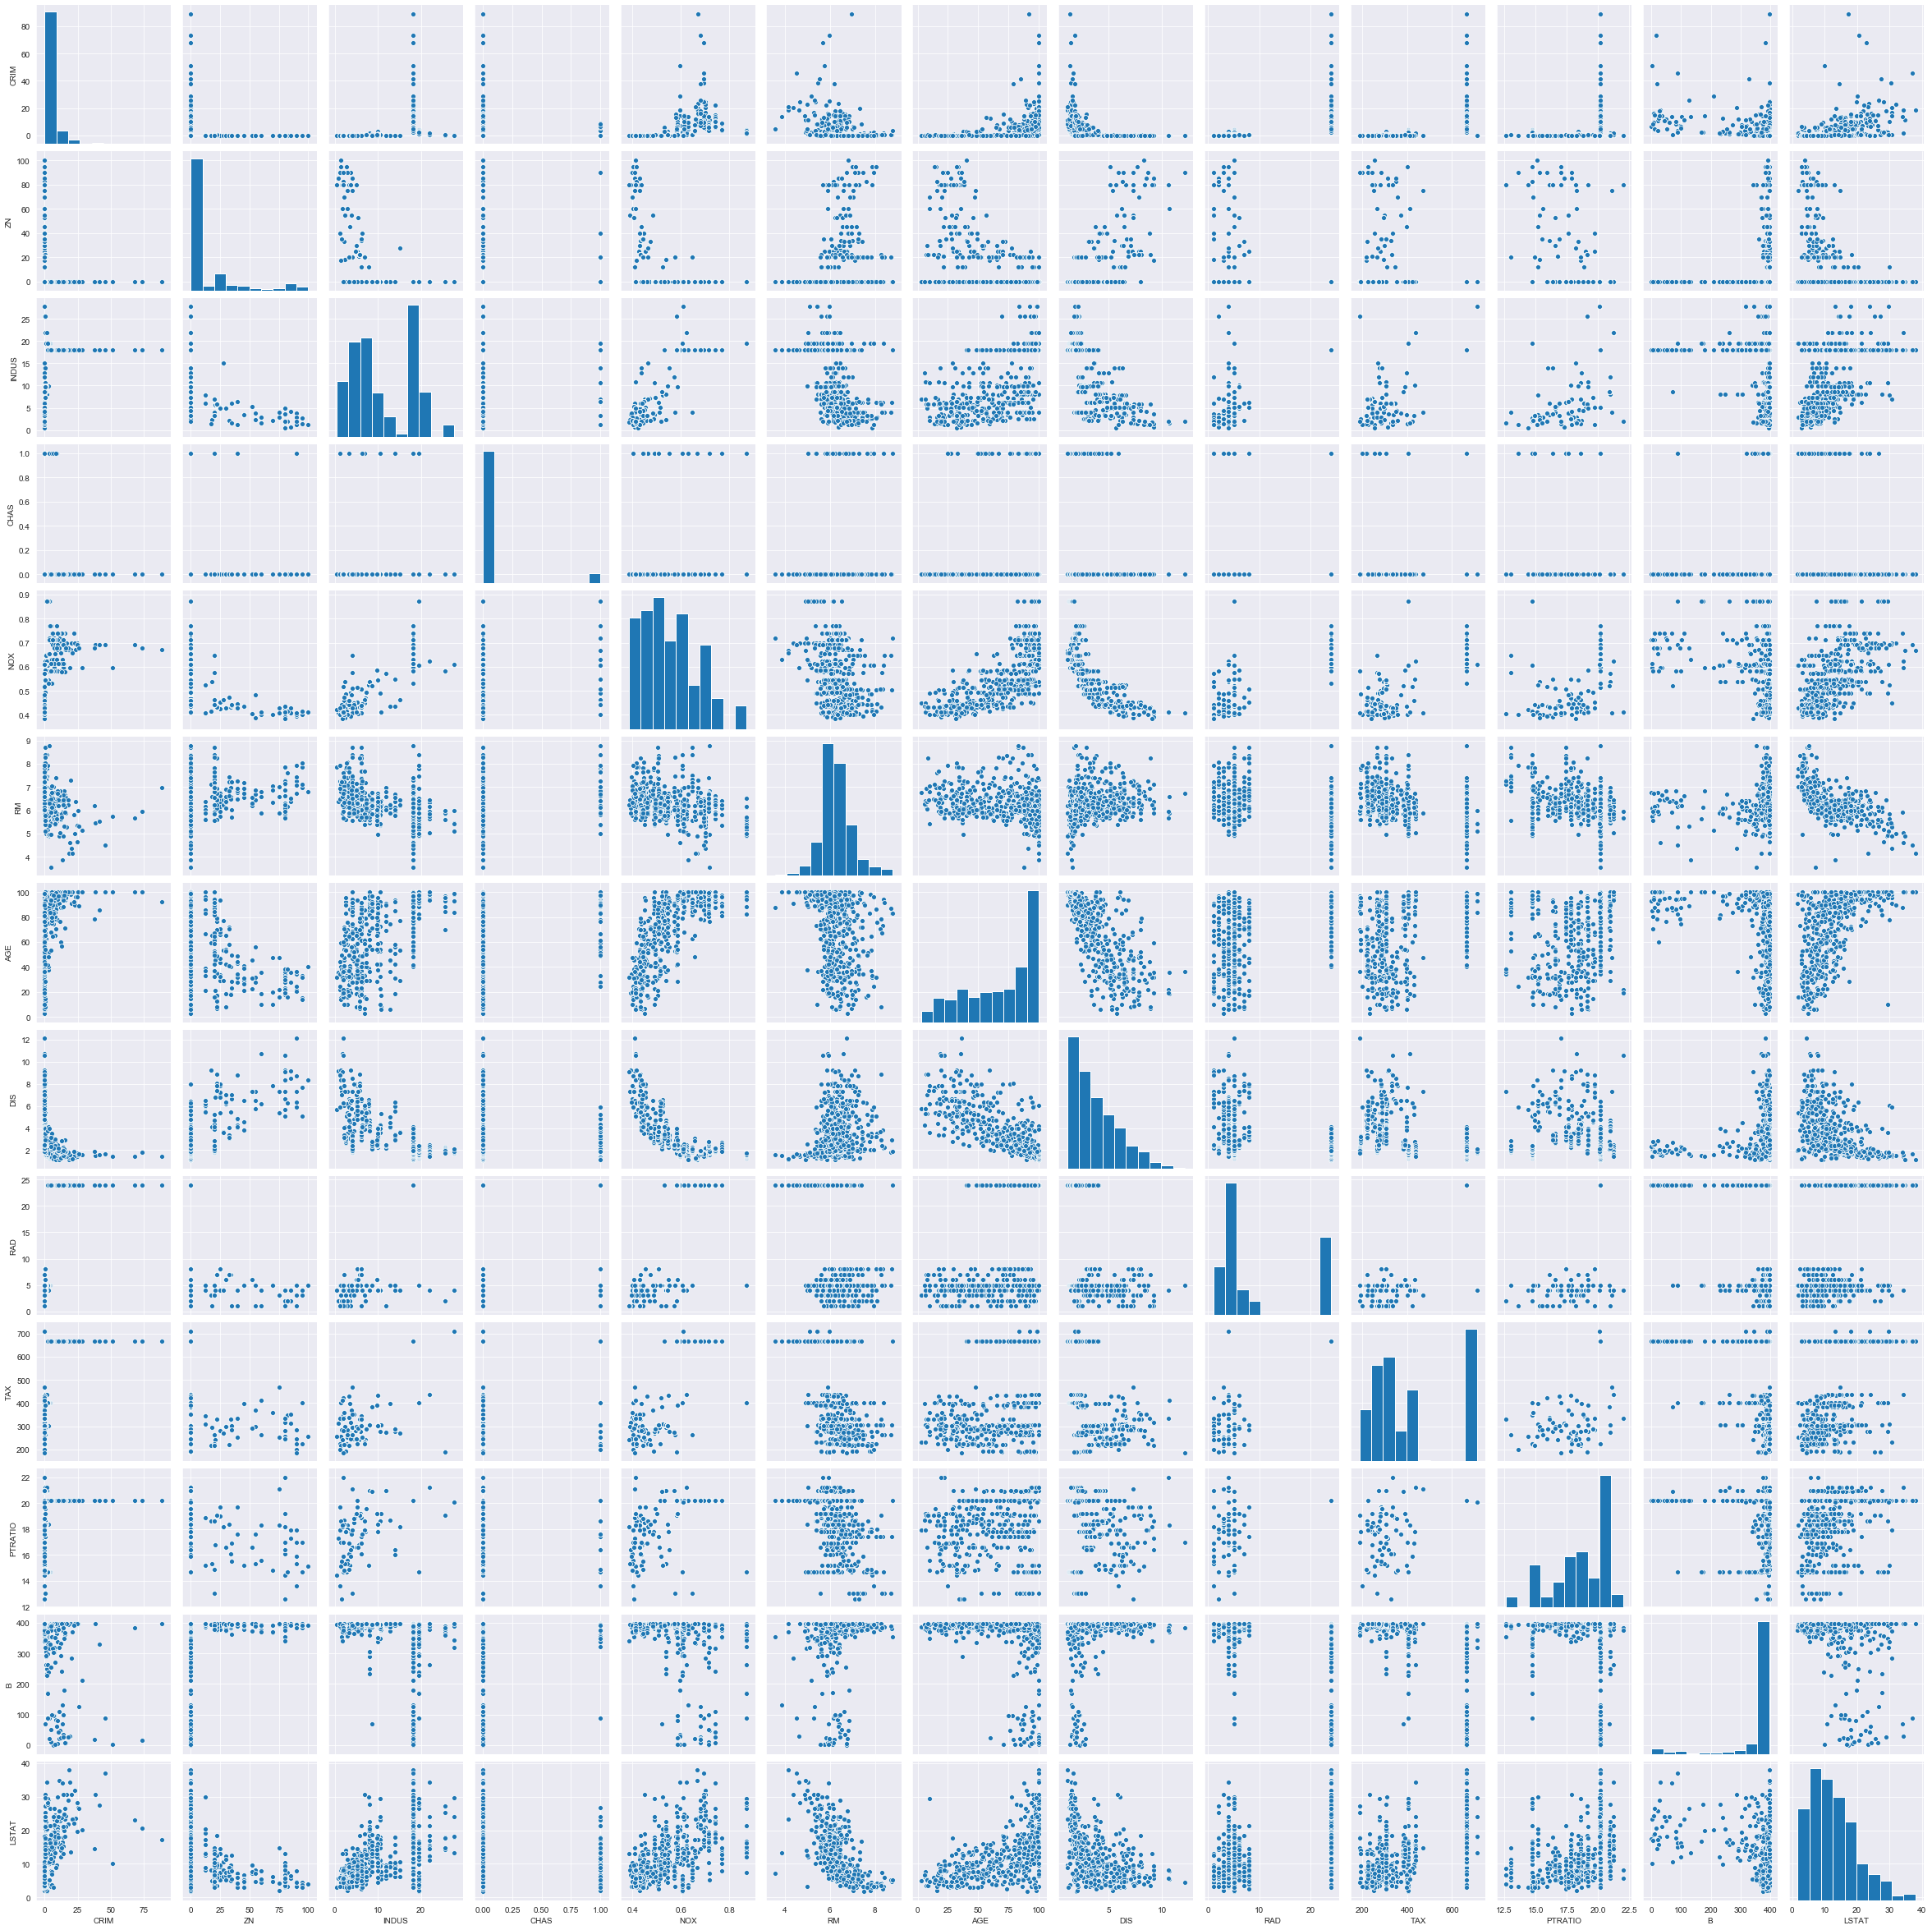

In [30]:
fig = plt.figure(figsize=(25,25))
sns.pairplot(X)

In [19]:
corr_data = X.corr()
corr_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


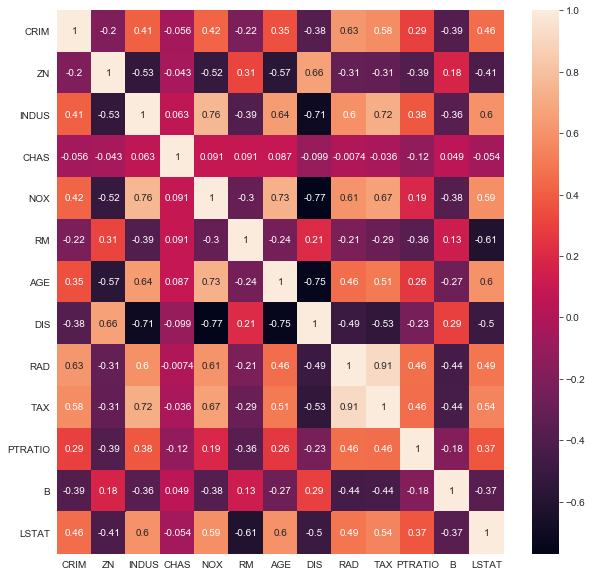

In [20]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(corr_data,annot = True)

* This dataset looks quite clean, and doesn't require to perform any kind of data cleaning / feature engineering steps *

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [22]:
X_Train,X_Test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 101)

In [24]:
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
model.fit(X_Train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
print (model.intercept_,model.coef_)

40.2189290125508 [-8.85049752e-02  5.02928536e-02  2.03483110e-02  3.75427054e+00
 -1.77483714e+01  3.24776492e+00  1.20008182e-02 -1.40916141e+00
  2.63880691e-01 -1.03440009e-02 -9.51780874e-01  6.11600491e-03
 -5.97133217e-01]


In [28]:
coef_df = pd.DataFrame(data=model.coef_, index =X.columns,columns = ['Coefficents'] )
coef_df

,Coefficents
CRIM,-0.088505
ZN,0.050293
INDUS,0.020348
CHAS,3.754271
NOX,-17.748371
RM,3.247765
AGE,0.012001
DIS,-1.409161
RAD,0.263881
TAX,-0.010344


In [33]:
predictions = model.predict(X_Test)
predictions

array([40.11113508, 27.38971873, 16.64700435, 16.98475572, 31.12920137,
       32.17489772, 38.5534506 ,  8.16734819, 33.48547457,  7.21877263,
       30.45404514, 13.44085219, 16.25354375, 17.34359227, 25.1543491 ,
       20.44171457,  7.30340549, 33.13892161, 28.41293108, 24.58522513,
       12.44673568, 20.25489284, 22.48601345, 24.42119495, 33.92740928,
       18.63104614, 32.32820984, 18.67352155, 27.36115374, 34.46174375,
       19.84089751, 18.40373436, 37.15821555, 44.94610923, 30.27513579,
       22.00760066, 16.0127978 , 18.16328402,  4.33298095, 30.93867591,
       24.15262229, 17.17277775, 34.10334259, 13.89433899, 17.46893797,
       25.30893285, 30.35309561, 16.10339452, 26.91513852, 22.98227547,
       32.14815603, 37.34454946, 22.90074019, 17.56894548, 30.18430234,
        0.10360753, 20.22573888, 16.82248142, 23.15487984, 21.16760077,
       30.5734497 ,  3.15502223, 15.92340596, 20.06361892, 10.43608925,
       24.28745773, 24.00445196, 19.86245393, 17.63614975, 19.44

## Model Performance Measurements

In [34]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [44]:
#  first two statistics indeed represents the same
print(model.score(X_Test,y_test),r2_score(y_test,predictions),mean_absolute_error(y_test,predictions),
      np.sqrt(mean_squared_error(y_test,predictions)))

0.7123963332666869 0.7123963332666869 3.835696361418929 5.342994036256092


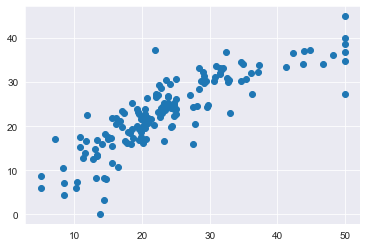

In [45]:
plt.scatter(x=y_test,y=predictions)

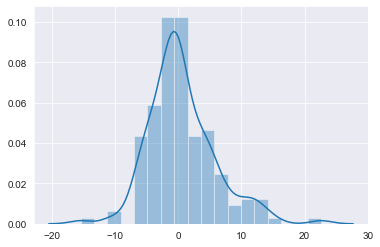

In [46]:
sns.distplot((y_test-predictions))

In [48]:
# MAE is roughly 17% of the mean value of the label !!
print((mean_absolute_error(y_test,predictions)*100) / dataset['target'].mean())

17.02271925763031


In [53]:
X_Test.iloc[0,:]

CRIM         0.01381
ZN          80.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.42200
RM           7.87500
AGE         32.00000
DIS          5.64840
RAD          4.00000
TAX        255.00000
PTRATIO     14.40000
B          394.23000
LSTAT        2.97000
Name: 195, dtype: float64

In [54]:
print(model.predict([X_Test.iloc[0,:]]),y_test[0])

[40.11113508] 50.0
